## Tutorial 1 - Autoencoder

In this example, we will use an autoencoder to 'learn' to recrate hand written digits.

In [1]:
import numpy as np

### Load and normalize our data

In [2]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


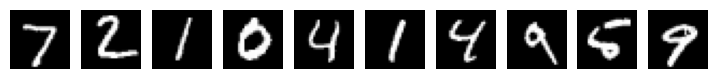

In [3]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

# Create an autoencoder model with the bottleneck of only six (6) neurons. 

In [4]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 6 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 6)                 606       
                                                                 
 dense_4 (Dense)             (None, 100)               700       
                                                                 
 dense_5 (Dense)             (None, 300)               30300     
                                                                 
 dense_6 (Dense)             (None, 500)               1

### Train the autoencoder model.

In [5]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 19s 36ms/step - loss: 0.1930 - val_loss: 0.1478
Epoch 2/10
469/469 [==============================] - 13s 28ms/step - loss: 0.1435 - val_loss: 0.1387
Epoch 3/10
469/469 [==============================] - 13s 27ms/step - loss: 0.1371 - val_loss: 0.1341
Epoch 4/10
469/469 [==============================] - 13s 27ms/step - loss: 0.1331 - val_loss: 0.1314
Epoch 5/10
469/469 [==============================] - 13s 28ms/step - loss: 0.1302 - val_loss: 0.1290
Epoch 6/10
469/469 [==============================] - 14s 30ms/step - loss: 0.1279 - val_loss: 0.1277
Epoch 7/10
469/469 [==============================] - 14s 30ms/step - loss: 0.1261 - val_loss: 0.1257
Epoch 8/10
469/469 [==============================] - 13s 27ms/step - loss: 0.1246 - val_loss: 0.1249
Epoch 9/10
469/469 [==============================] - 15s 31ms/step - loss: 0.1232 - val_loss: 0.1240
Epoch 10/10
469/469 [==============================] - 14s 30ms/step - loss: 0.122

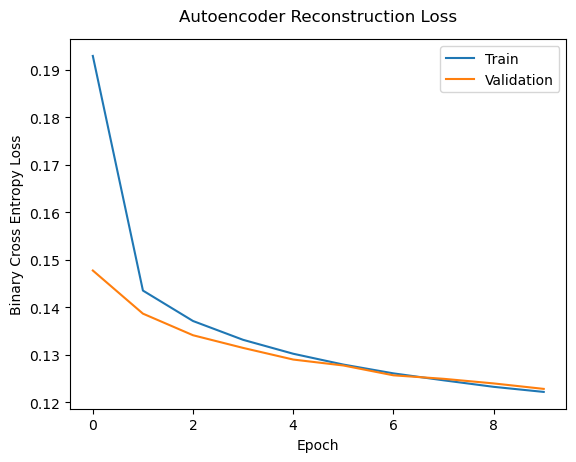

In [6]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 2s 5ms/step


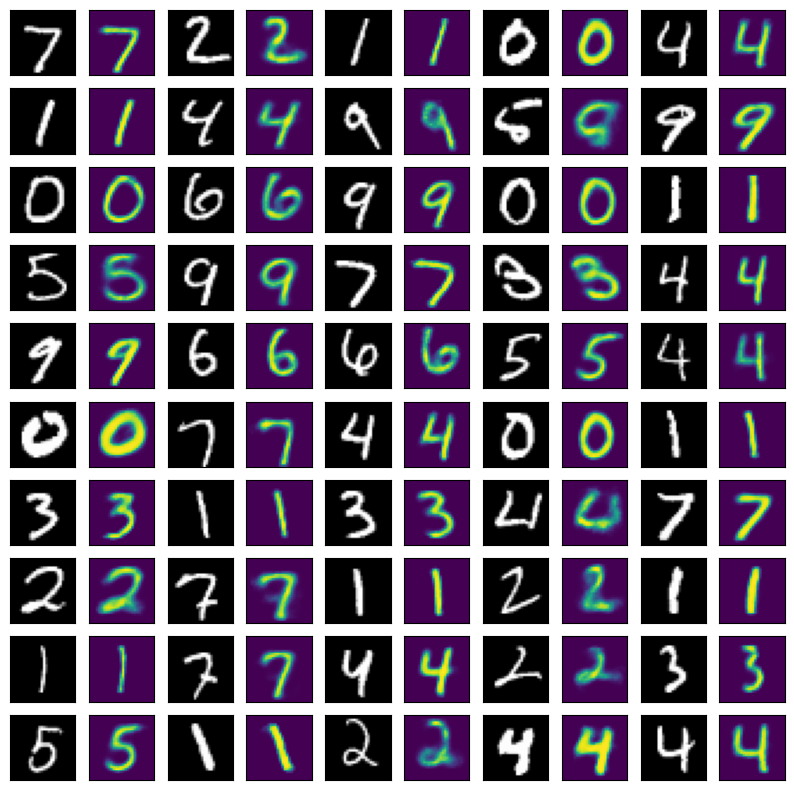

In [7]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Save the autoencoder for later user.

In [8]:
autoencoder.save('initially_trained_autoencoder_6_neurons.h5')

# Create an autoencoder model with the bottleneck of 100 neurons. 

In [9]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 100 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               392500    
                                                                 
 dense_9 (Dense)             (None, 300)               150300    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 300)               30300     
                                                                 
 dense_14 (Dense)            (None, 500)              

### Train the autoencoder model.

In [10]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)


Epoch 1/10
469/469 [==============================] - 16s 31ms/step - loss: 0.1761 - val_loss: 0.1200
Epoch 2/10
469/469 [==============================] - 15s 31ms/step - loss: 0.1107 - val_loss: 0.1010
Epoch 3/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0985 - val_loss: 0.0940
Epoch 4/10
469/469 [==============================] - 18s 37ms/step - loss: 0.0926 - val_loss: 0.0904
Epoch 5/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0890 - val_loss: 0.0869
Epoch 6/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0866 - val_loss: 0.0858
Epoch 7/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0848 - val_loss: 0.0838
Epoch 8/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0833 - val_loss: 0.0834
Epoch 9/10
469/469 [==============================] - 12s 27ms/step - loss: 0.0821 - val_loss: 0.0812
Epoch 10/10
469/469 [==============================] - 13s 28ms/step - loss: 0.081

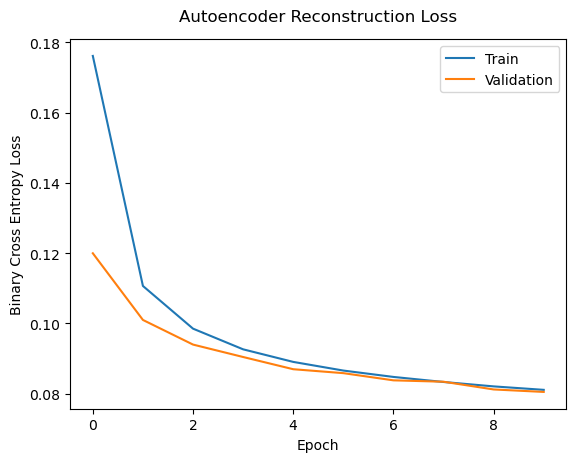

In [11]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 2s 4ms/step


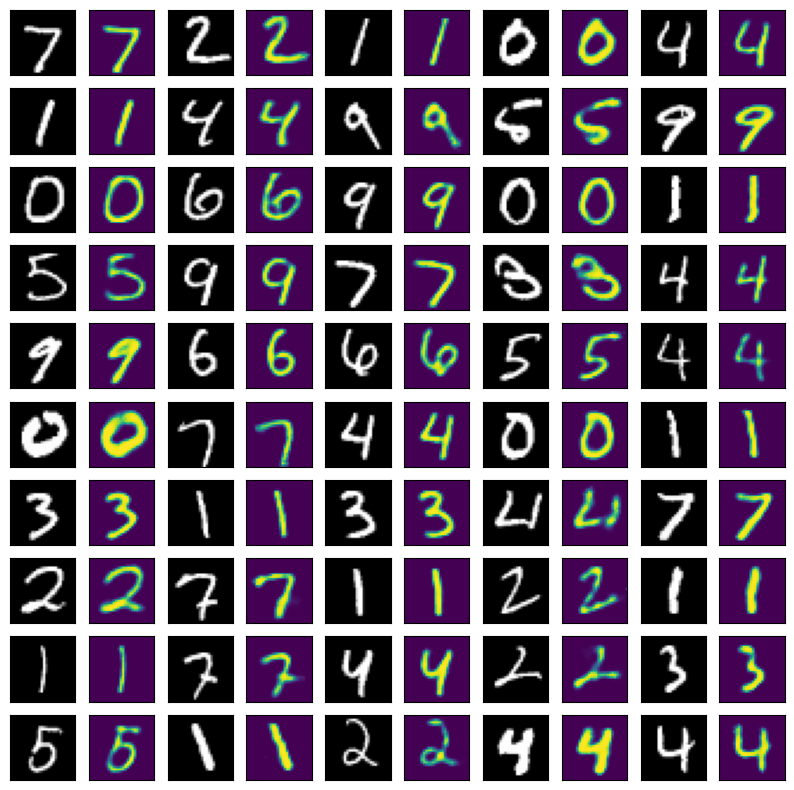

In [12]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Save the autoencoder for later user.

In [13]:
autoencoder.save('secondly_trained_autoencoder_100neurons.h5')

# Analysis

Using a bottleneck of 6 neurons in the autoencoder model did not result in significant changes, whereas increasing it to 100 neurons caused a slight increase in training time due to higher memory usage, but did not significantly affect the results for this particular dataset. However, increasing the bottleneck size to 100 neurons may lead to a higher risk of overfitting, increased complexity, longer training time, and loss of information.